# Pymaceuticals Inc.
---

### Analysis
##### Analysis can go here or at the bottom of the file.  I usually put it at the end.
1. There is a relatively strong correlation between the mouse weight and the tumor volume for the Capomulin treatment regimen. Larger mice seem to have more tumor volume on average. This data is data and correlation analysis is limited to one treatment.
2. For the Capomulin treatment based on the mouse I selected it looks like the treatment decreases the volume of the tumor the further out the timepoint (days) goes on. This data is limited to the mouse that I graphed. If I wanted to get more detail I could graph more mice under this treatment.
3. Based on the statistical summary we created based on mean, median, variance, std deviation, and SEM it looks like Capomulin had the lowest tumor volume on average and for the median. Not positve if the mice started out with lower tumor volumes or the Capomulin treatment caused the decrease in tumor volume, but looking at the treatments from a far it looks like Capomulin might have the most productive/positive results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_metadata.count()


# Display the data table for preview


Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [2]:
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
study_revised = pd.DataFrame(study_results.loc[(study_results["Timepoint"]==0),:])
study_revised.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
study_revised.count()

Mouse ID              250
Timepoint             250
Tumor Volume (mm3)    250
Metastatic Sites      250
dtype: int64

In [5]:
combined_mouse_data = pd.merge(study_revised, mouse_metadata, on="Mouse ID")
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_data[combined_mouse_data["Mouse ID"].duplicated() == True]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
108,g989,0,45.0,0,Propriva,Female,21,26


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
# There are multiple ways of doing this and it is good to search online to see the suggestions.

duplicate_id = combined_mouse_data[combined_mouse_data["Mouse ID"] == 'g989'].index

combined_mouse_data.drop(duplicate_id , inplace=True)
combined_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [10]:
# Checking the number of mice in the clean DataFrame.

combined_mouse_data["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


summary_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
summary_mouse_data







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [12]:
regimen_group = summary_mouse_data.groupby("Drug Regimen")

regimen_stats_df = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].mean())

regimen_stats_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [13]:
regimen_stats_df = regimen_stats_df.rename(
    columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
regimen_stats_df

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [14]:
median_group = summary_mouse_data.groupby("Drug Regimen")

regimen_median_df = pd.DataFrame(median_group["Tumor Volume (mm3)"].median())

regimen_median_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [15]:
regimen_median_df = regimen_median_df.rename(
    columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
regimen_median_df

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [16]:
variance_group = summary_mouse_data.groupby("Drug Regimen")

regimen_variance_df = pd.DataFrame(variance_group["Tumor Volume (mm3)"].var())

regimen_variance_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [17]:
regimen_variance_df = regimen_variance_df.rename(
    columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
regimen_variance_df

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [18]:
std_group = summary_mouse_data.groupby("Drug Regimen")

regimen_std_df = pd.DataFrame(std_group["Tumor Volume (mm3)"].std())

regimen_std_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [19]:
regimen_std_df = regimen_std_df.rename(
    columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
regimen_std_df

,Tumor Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [20]:
sem_group = summary_mouse_data.groupby("Drug Regimen")

regimen_sem_df = pd.DataFrame(sem_group["Tumor Volume (mm3)"].sem())

regimen_sem_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [21]:
regimen_sem_df = regimen_sem_df.rename(
    columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})
regimen_sem_df

,Tumor Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [22]:
dfs = [regimen_stats_df,regimen_median_df,regimen_variance_df,regimen_std_df,regimen_sem_df]

In [23]:
from functools import reduce

regimen_merged_df = reduce(lambda l, r: pd.merge(l, r, on='Drug Regimen', how='inner'), dfs)
regimen_merged_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line
aggregated_regimens = summary_mouse_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

aggregated_regimens


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_group = summary_mouse_data.groupby("Drug Regimen")

timepoint_stats_df = pd.DataFrame(timepoint_group["Timepoint"].count())




timepoint_sorted_df = timepoint_stats_df.sort_values(["Timepoint"],
                                           ascending=False)
timepoint_sorted_df


,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


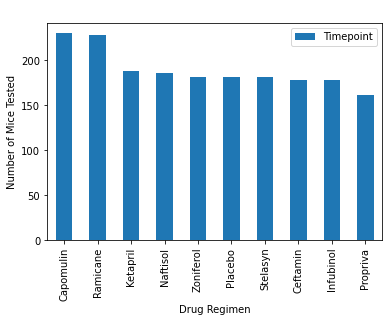

<Figure size 432x288 with 0 Axes>

In [27]:
timepoint_chart = timepoint_sorted_df.plot(kind="bar", title=" ")
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
drug_regimen = ["Capomulin","Ramicane","Ketapril","Naftisol","Zonerol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
timepoint = [230,228,188,186,182,181,181,178,178,161]
x_axis = np.arange(len(timepoint))




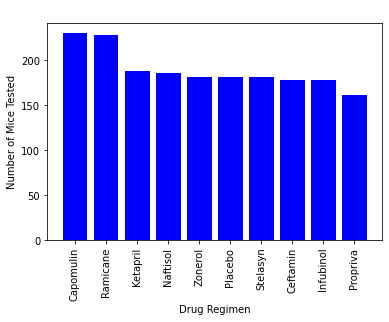

<Figure size 432x288 with 0 Axes>

In [29]:
plt.bar(x_axis, timepoint, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation="vertical")
plt.title(" ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.title(" ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

In [30]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than:  of all the mice, what percent were male and female?

sex_group = summary_mouse_data.groupby("Sex")

sex_stats_df = pd.DataFrame(sex_group["Sex"].count())


sex_stats_df





,Sex
Sex,
Female,935
Male,958


In [31]:
sex_stats_df = sex_stats_df.rename(
    columns={"Sex": "Sex Totals"})
sex_stats_df

,Sex Totals
Sex,
Female,935
Male,958


In [32]:

sex_sorted_df = sex_stats_df.sort_values(["Sex Totals"],
                                           ascending=False)
sex_sorted_df

,Sex Totals
Sex,
Male,958
Female,935


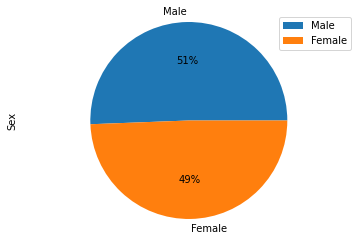

In [33]:
sex_pie = sex_sorted_df.plot(kind="pie", y='Sex Totals', autopct="%1.0f%%", title="")
sex_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

In [34]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.
import numpy as np

sex = ["Male", "Female"]
sex_total = [958,935]



(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

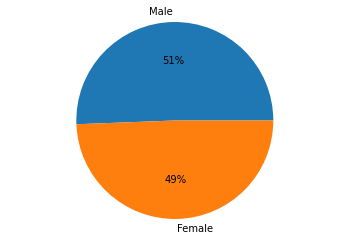

In [36]:
plt.pie(sex_total, labels=sex,
        autopct="%1.0f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

summary_mouse_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [36]:
df_capomulin_volume = summary_mouse_data.loc[summary_mouse_data["Drug Regimen"]== 'Capomulin']
df_capomulin_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [37]:
df_ramicane_volume = summary_mouse_data.loc[summary_mouse_data["Drug Regimen"]== 'Ramicane']
df_ramicane_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
436,c458,0,45.000000,0,Ramicane,Female,23,20
437,c458,5,45.722279,0,Ramicane,Female,23,20
438,c458,10,44.454378,1,Ramicane,Female,23,20
439,c458,15,45.107423,2,Ramicane,Female,23,20
440,c458,20,39.505135,2,Ramicane,Female,23,20
...,...,...,...,...,...,...,...,...
1665,i334,25,38.248817,1,Ramicane,Female,8,20
1666,i334,30,39.005554,1,Ramicane,Female,8,20
1667,i334,35,39.769552,2,Ramicane,Female,8,20
1668,i334,40,40.442370,2,Ramicane,Female,8,20


In [38]:
df_infubinol_volume = summary_mouse_data.loc[summary_mouse_data["Drug Regimen"]== 'Infubinol']
df_infubinol_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
213,c326,0,45.000000,0,Infubinol,Female,18,25
214,c326,5,36.321346,0,Infubinol,Female,18,25
215,c139,0,45.000000,0,Infubinol,Male,11,28
216,c139,5,48.753112,0,Infubinol,Male,11,28
217,c139,10,49.992954,0,Infubinol,Male,11,28
...,...,...,...,...,...,...,...,...
1655,f345,25,53.078894,0,Infubinol,Male,23,26
1656,f345,30,54.363797,1,Infubinol,Male,23,26
1657,f345,35,56.523327,1,Infubinol,Male,23,26
1658,f345,40,58.315593,1,Infubinol,Male,23,26


In [39]:
df_ceftamin_volume = summary_mouse_data.loc[summary_mouse_data["Drug Regimen"]== 'Ceftamin']
df_ceftamin_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1304,x822,0,45.000000,0,Ceftamin,Male,3,29
1305,x822,5,45.671104,1,Ceftamin,Male,3,29
1306,x822,10,48.983717,1,Ceftamin,Male,3,29
1307,x822,15,49.694665,1,Ceftamin,Male,3,29
1308,x822,20,51.914910,2,Ceftamin,Male,3,29
...,...,...,...,...,...,...,...,...
1645,q483,25,52.430066,1,Ceftamin,Male,6,26
1646,q483,30,54.952226,1,Ceftamin,Male,6,26
1647,q483,35,59.253484,1,Ceftamin,Male,6,26
1648,q483,40,64.192341,1,Ceftamin,Male,6,26


In [40]:
capomulin_lasttp = df_capomulin_volume.groupby('Mouse ID').max()['Timepoint']
capomulin_final_vol = pd.DataFrame(capomulin_lasttp)
capomulin_merged = pd.merge(capomulin_final_vol, summary_mouse_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [41]:
ramicane_lasttp = df_ramicane_volume.groupby('Mouse ID').max()['Timepoint']
ramicane_final_vol = pd.DataFrame(ramicane_lasttp)
ramicane_merged = pd.merge(ramicane_final_vol, summary_mouse_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [42]:
infubinol_lasttp = df_infubinol_volume.groupby('Mouse ID').max()['Timepoint']
infubinol_final_vol = pd.DataFrame(infubinol_lasttp)
infubinol_merged = pd.merge(infubinol_final_vol, summary_mouse_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [43]:
ceftamin_lasttp = df_ceftamin_volume.groupby('Mouse ID').max()['Timepoint']
ceftamin_final_vol = pd.DataFrame(ceftamin_lasttp)
ceftamin_merged = pd.merge(ceftamin_final_vol, summary_mouse_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
# More information should be provided about this part since it is confusing and difficult.
# Part of this is similar to Day3 but **the suggestions make more sense** if you know you are doing
# this so so you have 4 lists contained inside a list bc this is used to generate the boxplot in the next cell.


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

    
    
    
    
    
# Print results of each drugs outliers - results printed don't need to look pretty.  See below.    
# Note:  in the output below:  '31   36.32346' is series index 31 and value 36.32346.  There is only one outlier.



In [45]:
capomulin_tumor_volumes = capomulin_merged["Tumor Volume (mm3)"]
quartiles =capomulin_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin tumor volumes: {lowerq}")
print(f"The upper quartile of Capomulin tumor volumes: {upperq}")
print(f"The interquartile range of Capomulin tumor volumes: {iqr}")
print(f"The median of Capomulin tumor volumes: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumor volumes: 32.37735684
The upper quartile of Capomulin tumor volumes: 40.1592203
The interquartile range of Capomulin tumor volumes: 7.781863460000004
The median of Capomulin tumor volumes: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [46]:
ramicane_tumor_volumes = ramicane_merged["Tumor Volume (mm3)"]
quartiles =ramicane_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane tumor volumes: {lowerq}")
print(f"The upper quartile of Ramicane tumor volumes: {upperq}")
print(f"The interquartile range of Ramicane tumor volumes: {iqr}")
print(f"The median of Ramicane tumor volumes: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor volumes: 31.56046955
The upper quartile of Ramicane tumor volumes: 40.65900627
The interquartile range of Ramicane tumor volumes: 9.098536719999998
The median of Ramicane tumor volumes: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [47]:
infubinol_tumor_volumes = infubinol_merged["Tumor Volume (mm3)"]
quartiles =infubinol_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol tumor volumes: {lowerq}")
print(f"The upper quartile of Infubinol tumor volumes: {upperq}")
print(f"The interquartile range of Infubinol tumor volumes: {iqr}")
print(f"The median of Infubinol tumor volumes: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor volumes: 54.04860769
The upper quartile of Infubinol tumor volumes: 65.52574285
The interquartile range of Infubinol tumor volumes: 11.477135160000003
The median of Infubinol tumor volumes: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [48]:
ceftamin_tumor_volumes = ceftamin_merged["Tumor Volume (mm3)"]
quartiles =ceftamin_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ceftamin tumor volumes: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volumes: {upperq}")
print(f"The interquartile range of Ceftamin tumor volumes: {iqr}")
print(f"The median of Ceftamin tumor volumes: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor volumes: 48.72207785
The upper quartile of Ceftamin tumor volumes: 64.29983003
The interquartile range of Ceftamin tumor volumes: 15.577752179999997
The median of Ceftamin tumor volumes: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


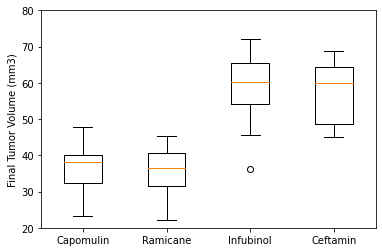

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

volumes_plot = [capomulin_tumor_volumes, ramicane_tumor_volumes, infubinol_tumor_volumes, ceftamin_tumor_volumes]
regimens= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('')
ax1.boxplot(volumes_plot, labels=regimens)
plt.ylim(20, 80)
plt.show()



## Line and Scatter Plots

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line = df_capomulin_volume.loc[df_capomulin_volume["Mouse ID"] == "b128",:]

capomulin_line.head()







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


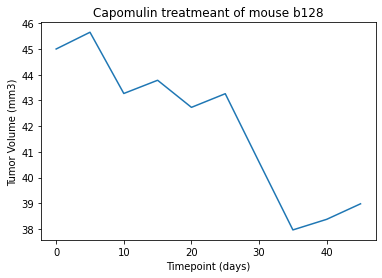

In [51]:
x_axis = capomulin_line["Timepoint"]
y_axis = capomulin_line["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


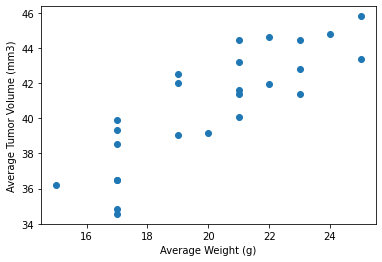

In [52]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"

fig1, ax1 = plt.subplots()
capomulin_averages =df_capomulin_volume.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_averages['Weight (g)'],capomulin_averages['Tumor Volume (mm3)'])
plt.title('')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()





## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


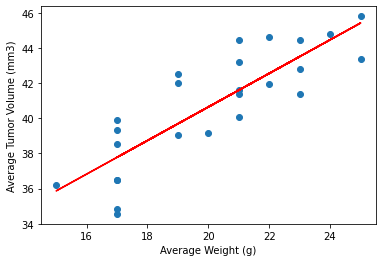

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = (st.pearsonr(capomulin_averages['Weight (g)'],capomulin_averages['Tumor Volume (mm3)']))
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
from scipy.stats import linregress
x_values = capomulin_averages['Weight (g)']
y_values = capomulin_averages['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_eq,(0,30),fontsize=12,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()




In [54]:
print(line_eq)

y = 0.95x + 21.55
